In [152]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Salary Data Analysis

In [153]:
# Reading the data
df = pd.read_csv("SalaryData.csv");

In [154]:
df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [155]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [156]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [157]:
df.groupby('Education').sum().Salary.index

Index([' Bachelors', ' Doctorate', ' HS-grad'], dtype='object', name='Education')

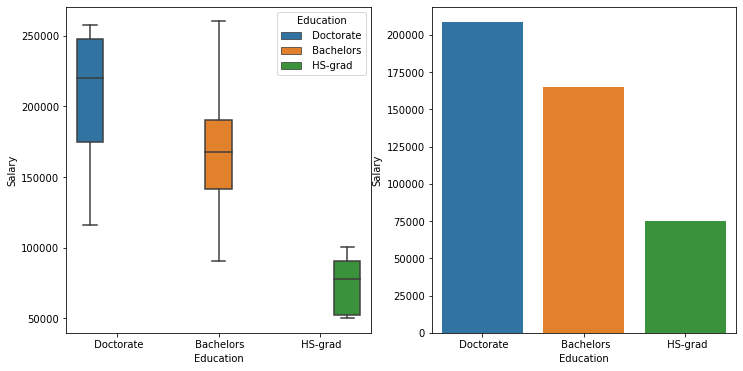

In [158]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x = df.Education, y = df.Salary, hue = df.Education);
plt.subplot(1,2,2)
sns.barplot(y = df.groupby('Education').mean().Salary, x = df.groupby('Education').sum().Salary.index, order = df.Education.value_counts().index);

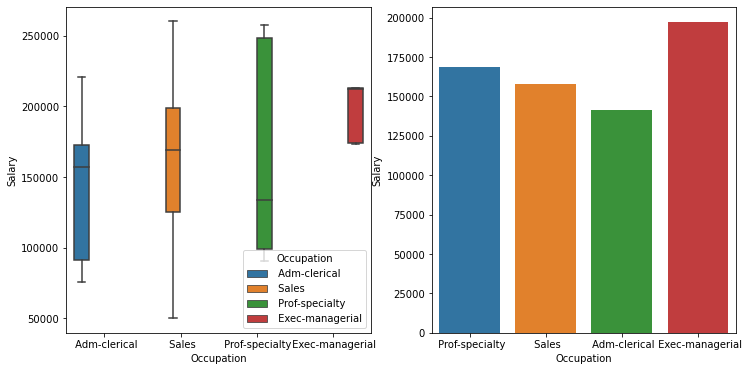

In [159]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x = df.Occupation, y = df.Salary, hue = df.Occupation);
plt.subplot(1,2,2)
sns.barplot(y = df.groupby('Occupation').mean().Salary, x = df.groupby('Occupation').sum().Salary.index, order = df.Occupation.value_counts().index);

In [160]:
# Importing necessary libraries to perform ANOVA
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

In [161]:
# Perfoming one-way ANOVA for Education with respect to 'Salary'
 
mod = ols('Salary ~ C(Education)', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [162]:
# Perfoming one-way ANOVA for Occupation with respect to 'Salary'
 
mod = ols('Salary ~ C(Occupation)', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [163]:
# Importing MultiComparison for Post-Hoc analysis
from statsmodels.sandbox.stats.multicomp import MultiComparison
import warnings
warnings.filterwarnings("ignore")

In [164]:
multiComp = MultiComparison(df['Salary'], df['Education']);
multiComp.tukeyhsd().summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [165]:
from statsmodels.graphics.factorplots import interaction_plot

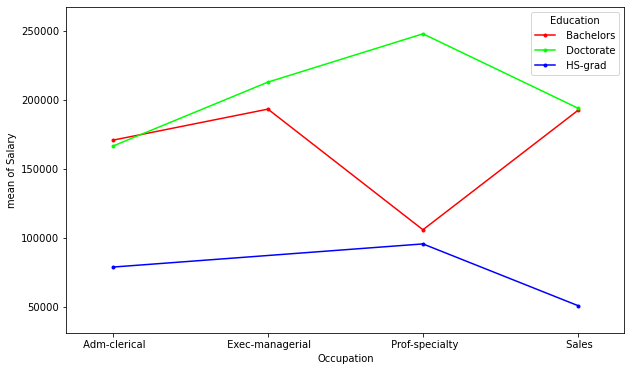

In [166]:

fig, ax = plt.subplots(figsize=(10, 6));
fig = interaction_plot(x = df['Occupation'], trace = df['Education'], response = df['Salary'], ylabel='Salary', xlabel='Occupation', ax=ax);


In [167]:
# Performing 2-Way ANOVA

formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'

In [168]:

mod = ols(formula, data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


# Education - Post 12th, PC Analysis

In [169]:
edf = pd.read_csv("Education+-+Post+12th+Standard.csv")

In [170]:
edf.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [171]:
edf.duplicated().any()

False

In [172]:
edf.isnull().sum().any()

False

In [173]:
edf.shape

(777, 18)

In [174]:
edf.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [175]:
edf.Names.nunique()

777

### 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

#### Univariate Analysis

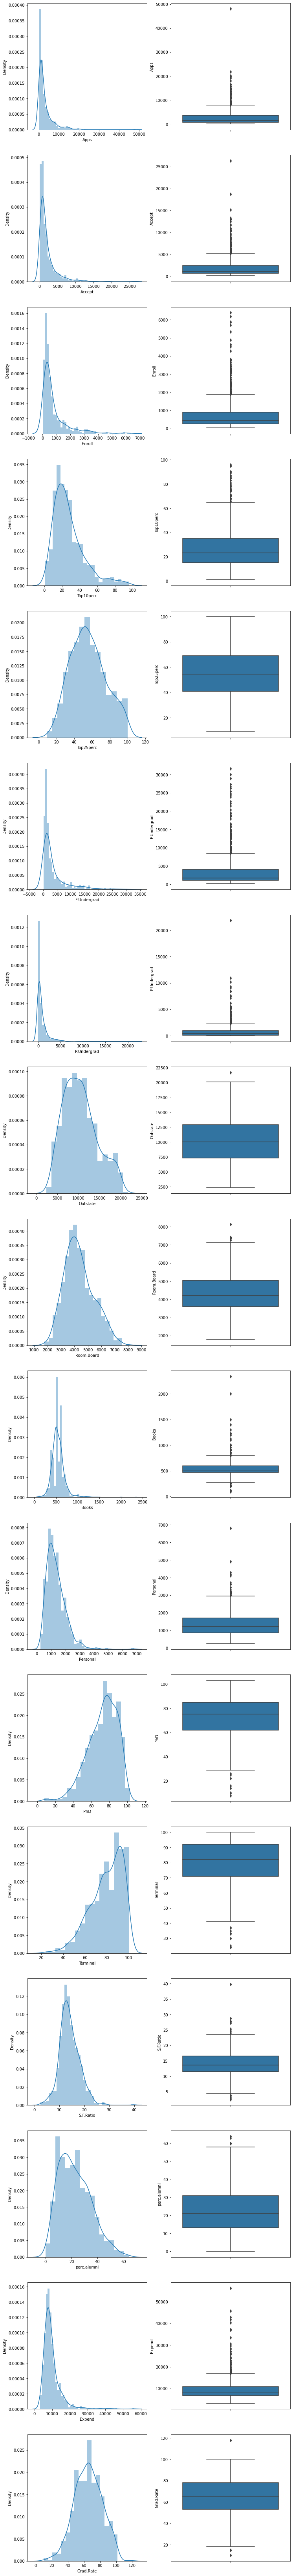

In [176]:
num_cols = edf.select_dtypes(include = ['int64','float64']).columns;

plt.figure(figsize=(12,120))
for i in range(0,len(num_cols)):
    plt.subplot(17,2,2*i+1)
    sns.distplot(x = edf[num_cols[i]], axlabel = num_cols[i]);
    
    plt.subplot(17,2,2*i+2)
    sns.boxplot(y = edf[num_cols[i]]);

#### Bi-variate Analysis

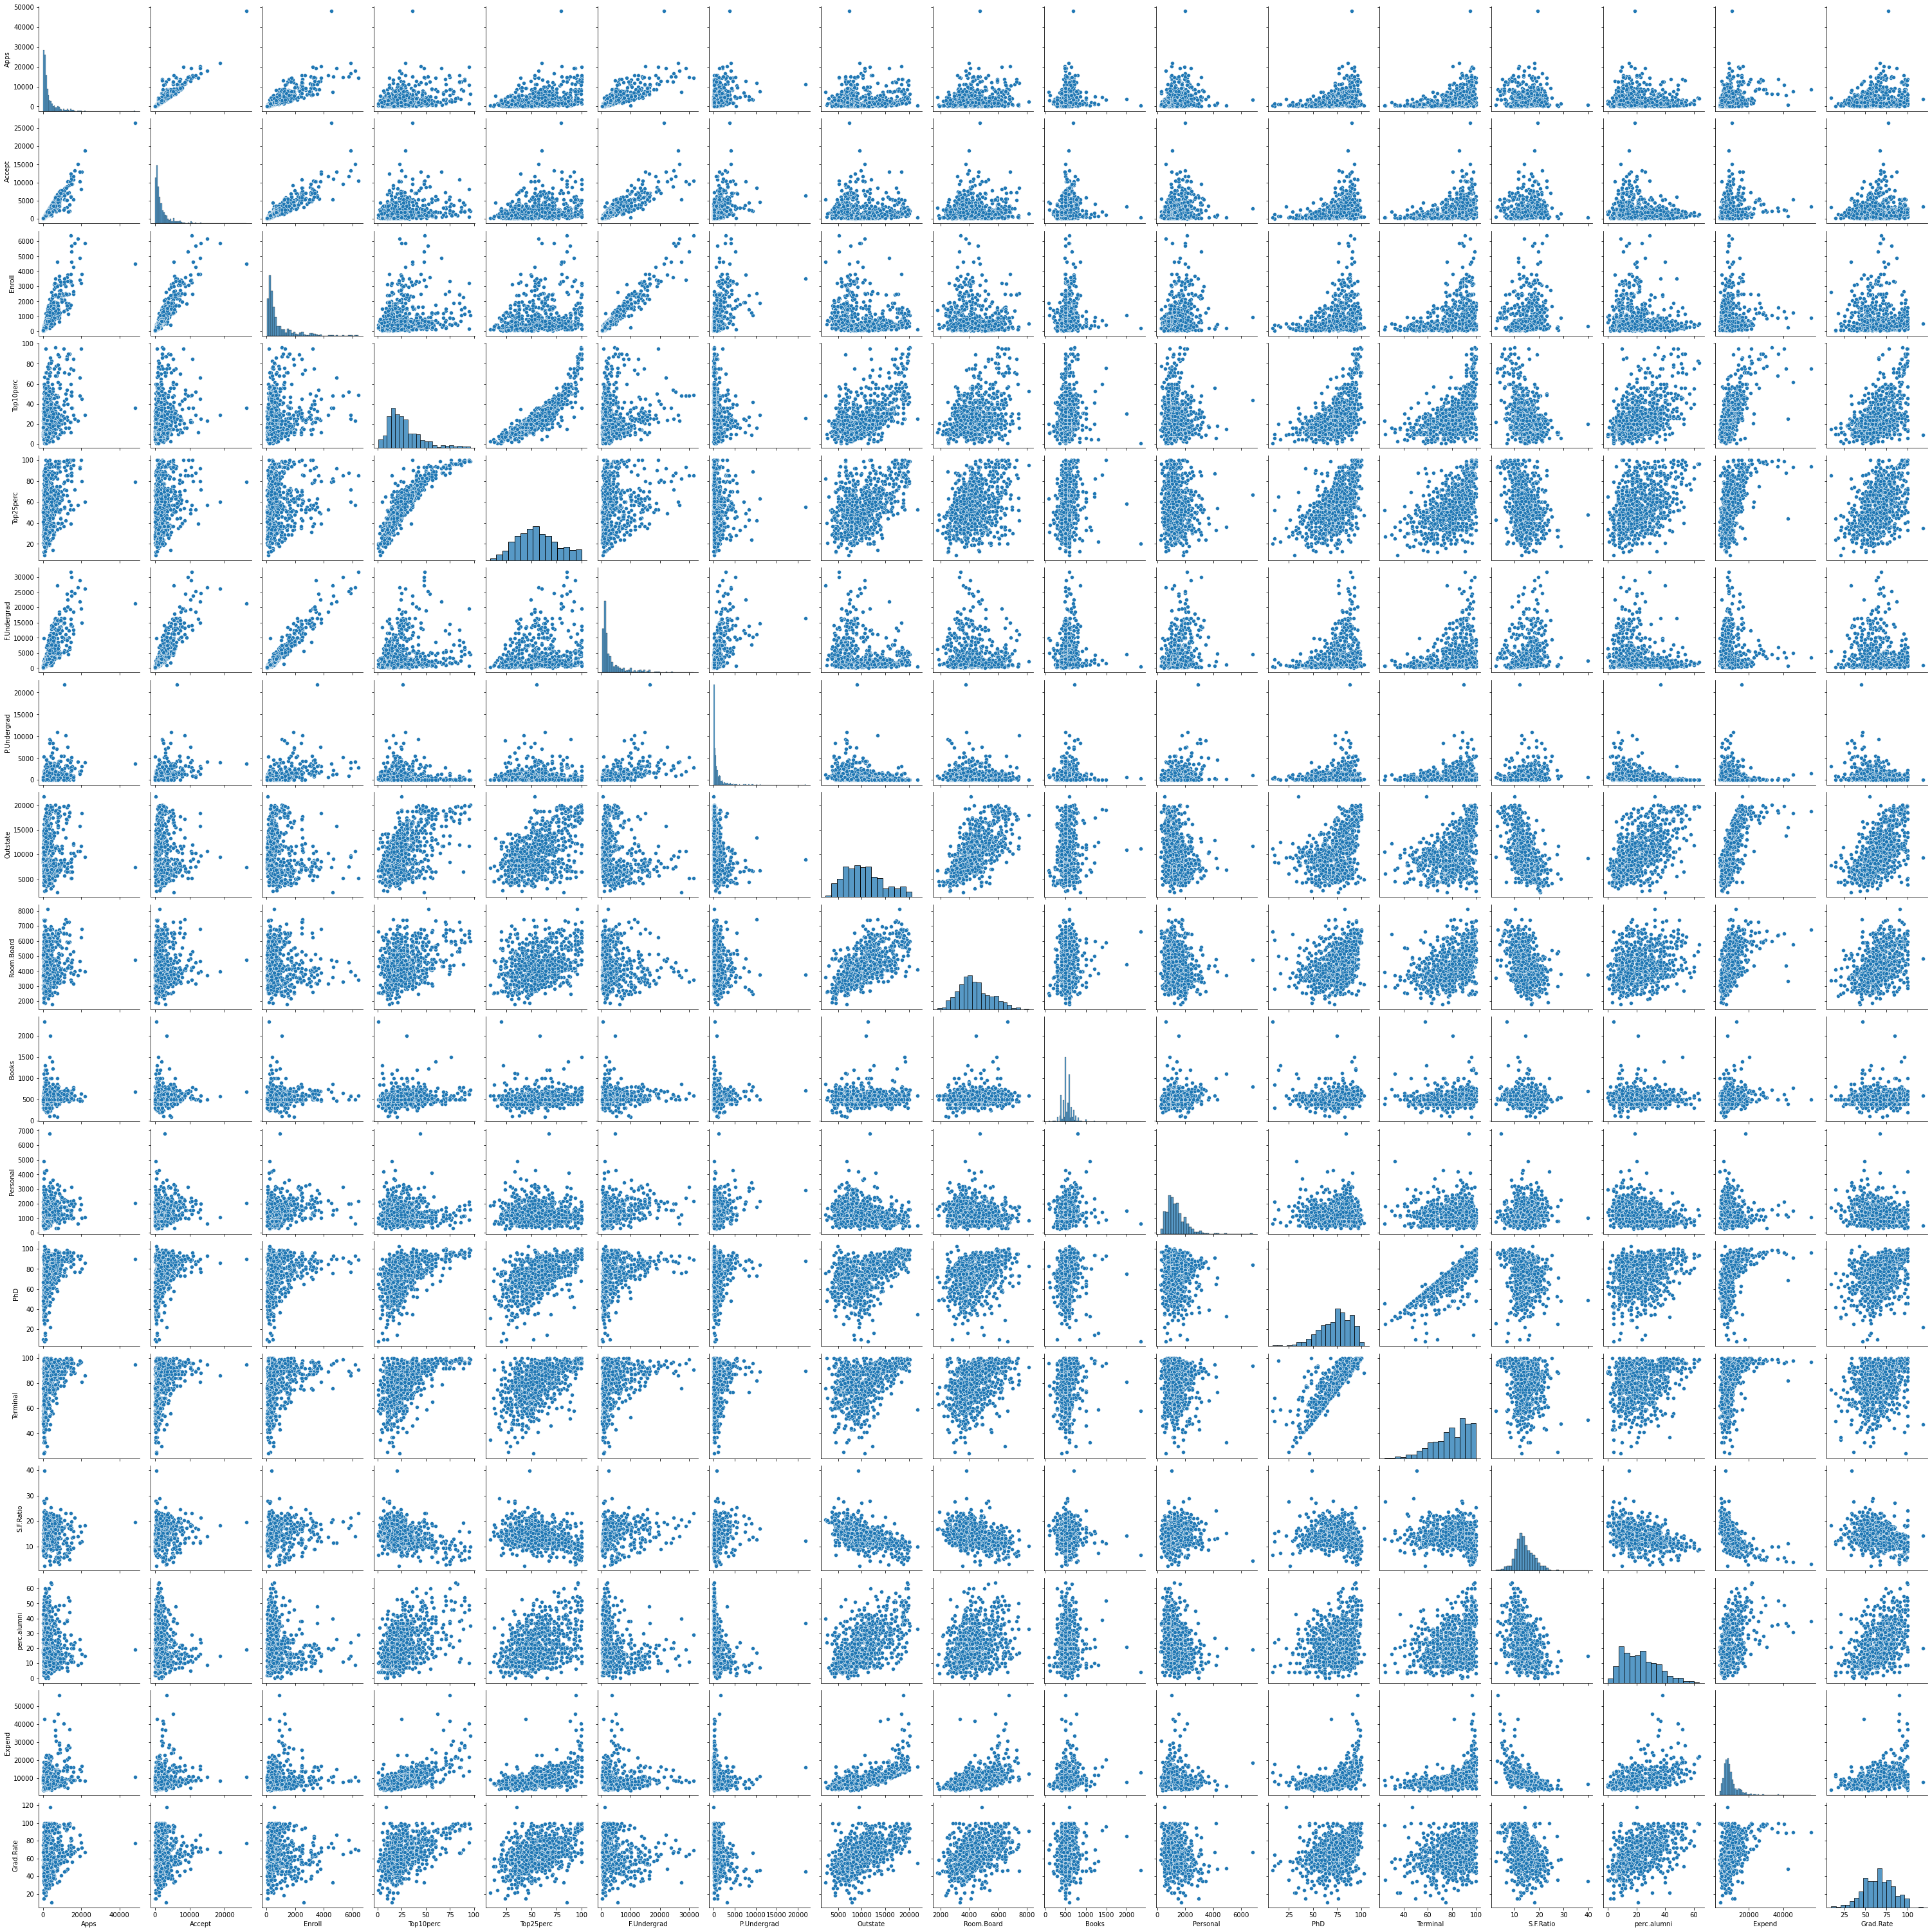

In [177]:
num_df = edf.select_dtypes(include = ['int64','float64'])
sns.pairplot(num_df);

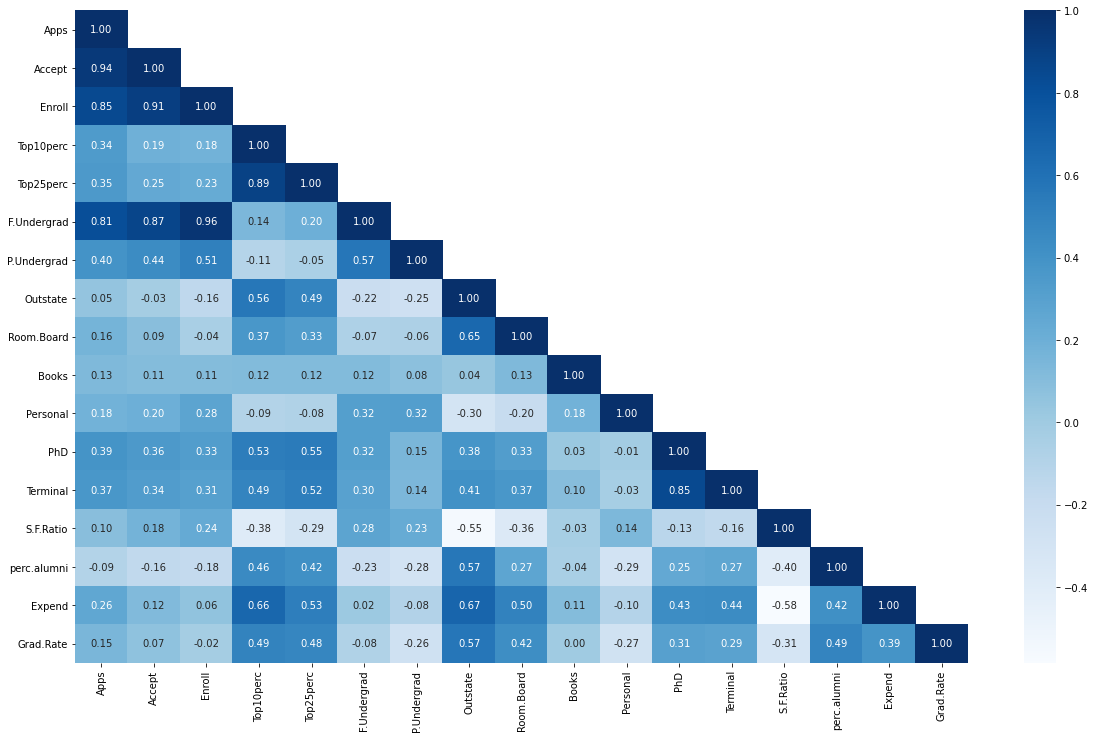

In [178]:
corr = num_df.corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, fmt = '.2f', mask = np.triu(corr,+1), cmap='Blues');

### 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [179]:
# applying Z-score
from scipy.stats import zscore
num_scaled_df = num_df.apply(zscore)

num_scaled_df.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

### 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

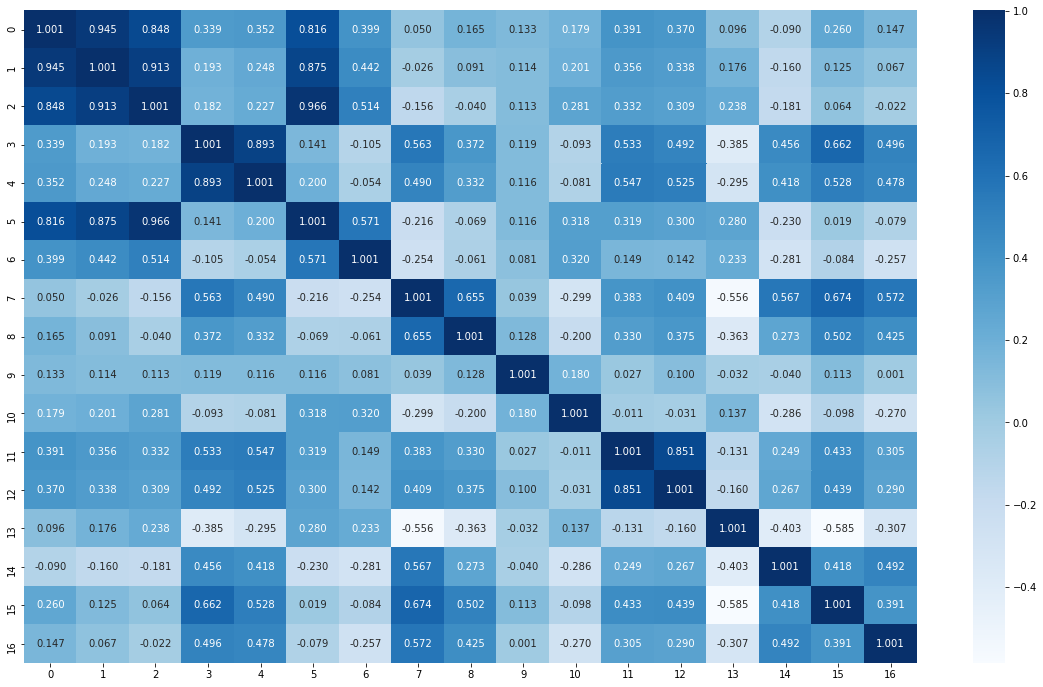

In [180]:
cov_mat = np.cov(num_scaled_df.T)

plt.figure(figsize=(20,12))
sns.heatmap(cov_mat, annot=True, fmt = '.3f', cmap='Blues');

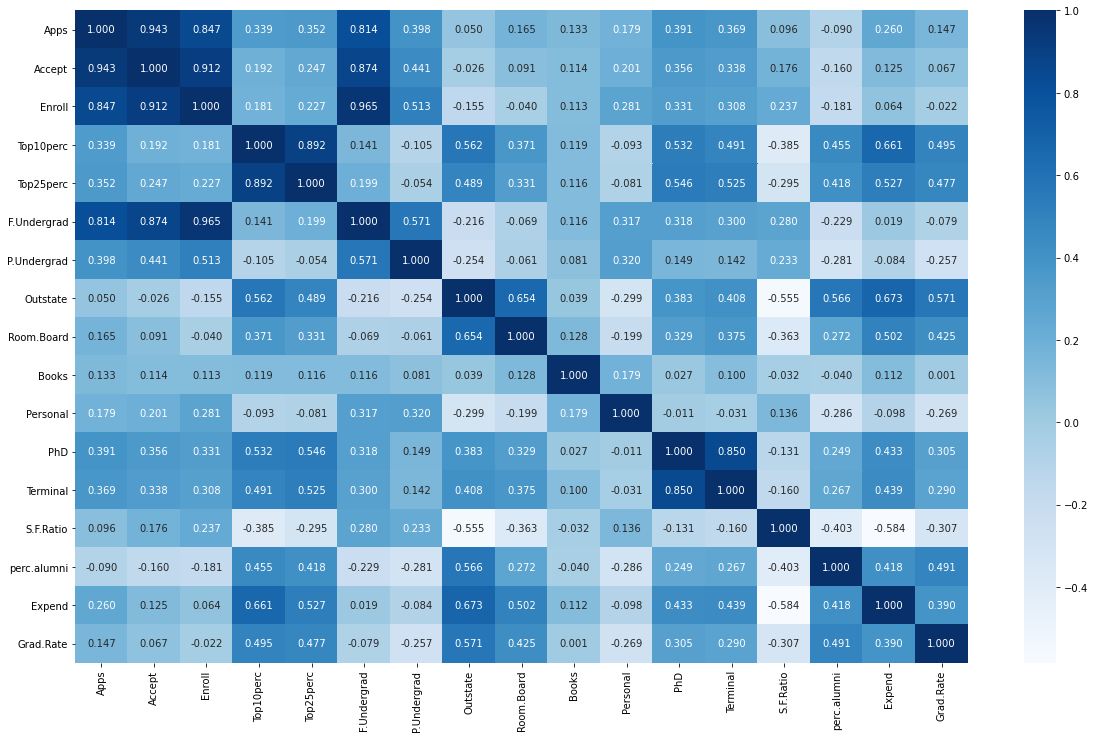

In [181]:
corr = num_scaled_df.corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, fmt = '.3f', cmap='Blues');

### 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

#### Before Scaling

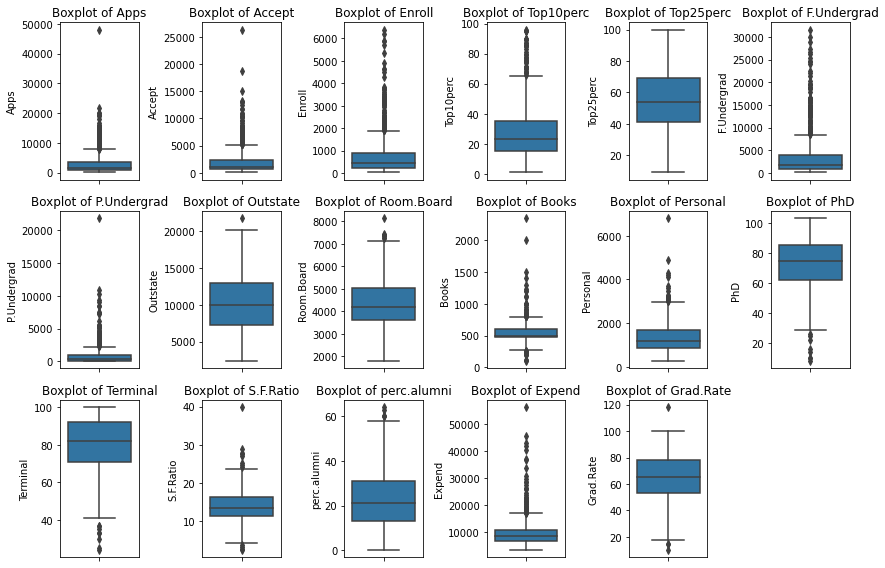

In [182]:
plt.figure(figsize = (12,8))
feature_list = num_df.columns
for i in range(len(feature_list)):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y = num_df[feature_list[i]], data = num_df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### After Scaling

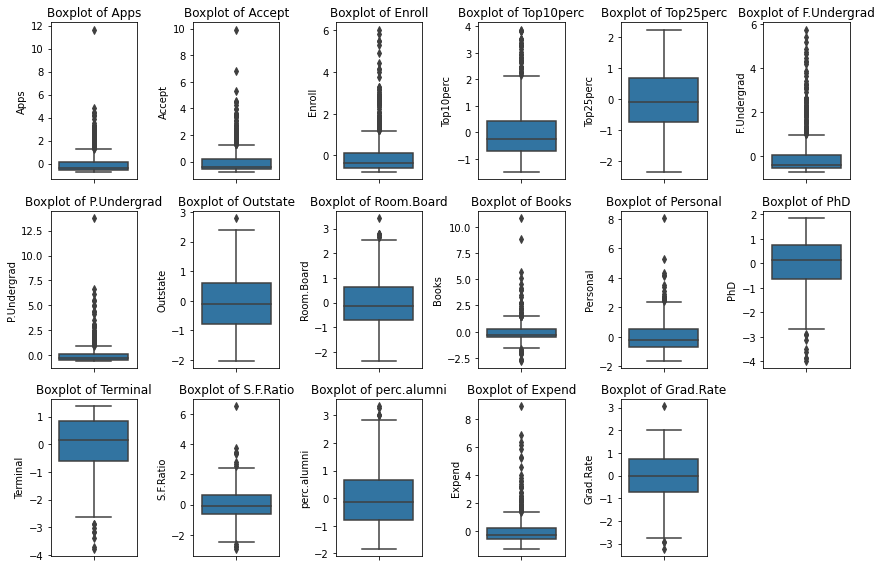

In [183]:
plt.figure(figsize = (12,8))
feature_list = num_scaled_df.columns
for i in range(len(feature_list)):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y = num_scaled_df[feature_list[i]], data = num_scaled_df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### Clean-up Incorrect Values

In [184]:
num_df = num_df[((num_df['Top10perc']>=0) & (num_df['Top10perc']<=100))
                & ((num_df['Top25perc']>=0) & (num_df['Top25perc']<=100))
                & ((num_df['PhD']>=0) & (num_df['PhD']<=100))
                & ((num_df['Terminal']>=0) & (num_df['Terminal']<=100))
                & ((num_df['Grad.Rate']>=0) & (num_df['Grad.Rate']<=100))]

num_df.shape

(775, 17)

#### Treating the outliers

In [185]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [186]:
cols = num_df.columns;

for i in range(0,len(cols)):
    lratio,uratio=remove_outlier(num_df[cols[i]])
    num_df[cols[i]]=np.where(num_df[cols[i]]>uratio, uratio, num_df[cols[i]])
    num_df[cols[i]]=np.where(num_df[cols[i]]<lratio, lratio, num_df[cols[i]])

In [187]:
# Apply Z-Score after Outlier Treatment
scaled_df = num_df.apply(zscore)
scaled_df.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376405 -0.337000  0.104764  -0.248566  -0.193670    -0.026037   
1 -0.158559  0.119427 -0.261548  -0.697905  -1.355233    -0.099944   
2 -0.472489 -0.426043 -0.570021  -0.312757  -0.294675    -0.702540   
3 -0.891201 -0.919407 -0.918806   2.126516   1.674931    -0.894991   
4 -0.983972 -1.053301 -1.062527  -0.697905  -0.597692    -0.990484   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.168207 -0.748607   -0.968894 -0.773275  1.442684 -0.176366 -0.125712   
1     0.794996  0.455622    1.920185  1.824308  0.288632 -2.764230 -2.793509   
2    -0.779631  0.199351   -0.556169 -1.206206 -0.263664 -1.249383 -0.957233   
3    -0.829885  0.624812    1.003017 -0.773275 -0.741771  1.212244  1.190863   
4     0.295248 -0.718750   -0.216816  2.226933  0.288632  0.202346 -0.541472   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070994    -0.870528 -0.631759  -0.318831  
1  -0.487903    -0.546134  0.392874  -0.553573  
2  -0.302949     0.589247 -0.133845  -0.670943  
3  -1.676892     1.156937  2.291502  -0.377517  
4  -0.567169    -1.681514  0.508976  -2.930326

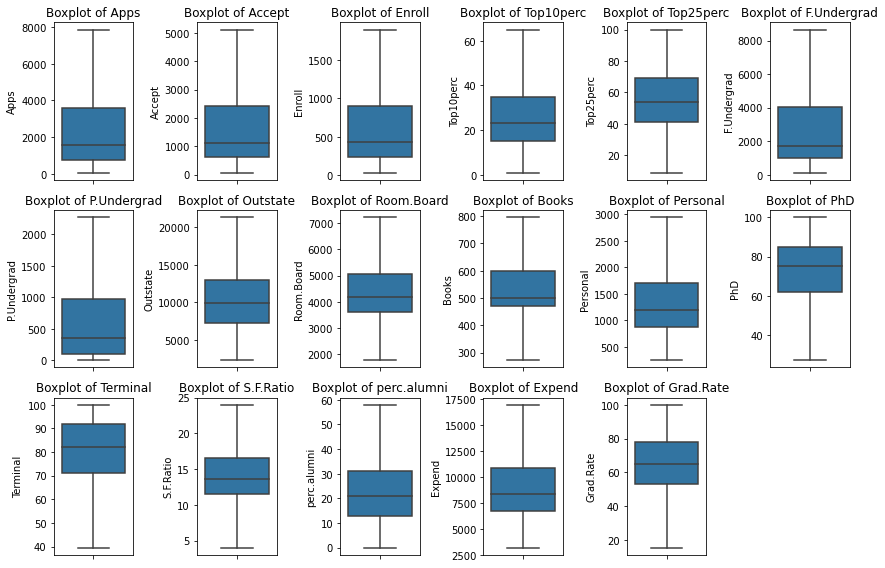

In [188]:
plt.figure(figsize = (12,8))
feature_list = num_df.columns
for i in range(len(feature_list)):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y = num_df[feature_list[i]], data = num_df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

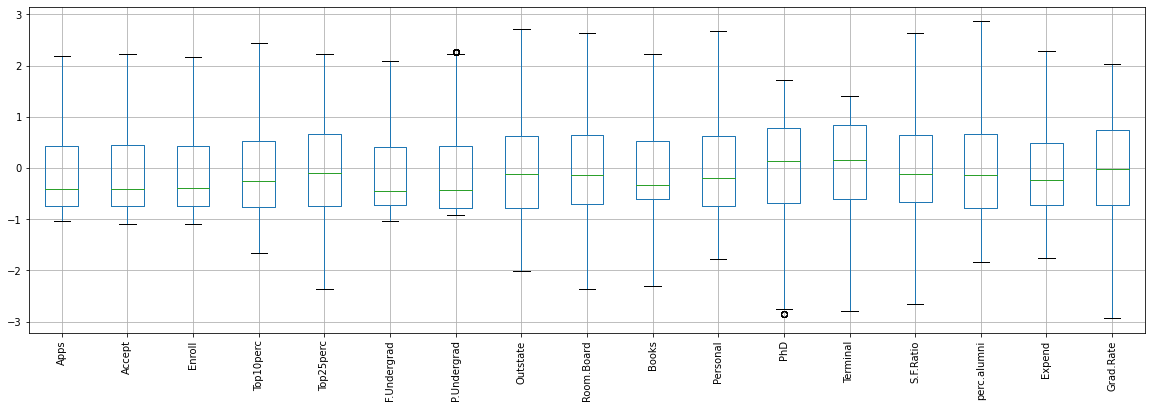

In [189]:
scaled_df.boxplot(figsize=(20,6))
plt.xticks(rotation=90)
plt.show()

### Principal Component Analysis

### 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [190]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df)
chi_square_value,p_value

(13297.282254316146, 0.0)

In [191]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_df)
kmo_model

0.8502154453362346

In [192]:
# Import Sklearn for PCA
from sklearn.decomposition import PCA

In [193]:
pca = PCA()
data_reduced = pca.fit_transform(scaled_df)
#data_reduced.transpose()

In [194]:
# Extract Eigen vector
evec = pd.DataFrame(pca.components_)
np.set_printoptions(formatter={'float': "{: 0.3f} ".format})
print(pca.components_)

[[ 0.261   0.229   0.187   0.339   0.334   0.161   0.020   0.284   0.244
   0.096  -0.037   0.328   0.323  -0.163   0.187   0.329   0.242 ]
 [ 0.315   0.346   0.383  -0.098  -0.058   0.399   0.357  -0.251  -0.131
   0.094   0.232   0.057   0.044   0.259  -0.256  -0.158  -0.167 ]
 [-0.076  -0.102  -0.083   0.077   0.048  -0.072  -0.041  -0.011   0.028
   0.700   0.527  -0.091  -0.068  -0.278  -0.104   0.187  -0.240 ]
 [ 0.082   0.103  -0.001  -0.378  -0.426   0.008   0.233   0.260   0.583
  -0.050  -0.123  -0.101  -0.043  -0.249  -0.232   0.215  -0.070 ]
 [ 0.227   0.196   0.171   0.141   0.118   0.113  -0.071   0.061  -0.039
  -0.025  -0.002  -0.557  -0.602  -0.196   0.108   0.012   0.316 ]
 [ 0.018  -0.005  -0.055  -0.079  -0.019  -0.043  -0.020  -0.011   0.243
   0.633  -0.383  -0.043  -0.014   0.459   0.022  -0.234   0.337 ]
 [-0.022  -0.009  -0.012  -0.257  -0.241  -0.029  -0.013   0.096   0.098
  -0.112   0.640   0.080   0.076   0.144   0.385  -0.149   0.479 ]
 [-0.089  -0.136  -0

In [195]:
#Extract the eigen values
pca.explained_variance_

array([ 5.681 ,  4.904 ,  1.128 ,  1.001 ,  0.852 ,  0.761 ,  0.586 ,
        0.545 ,  0.422 ,  0.383 ,  0.247 ,  0.147 ,  0.134 ,  0.098 ,
        0.075 ,  0.037 ,  0.022 ])

### 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [196]:
# exporting data into dataframe

df_pca_comp = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6'
                                                ,'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'
                                                ,'PC13','PC14','PC15','PC16','PC17'],
                                    index = scaled_df.columns)
df_pca_comp

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.260650  0.315477 -0.075692  0.082170  0.227402  0.018375   
Accept       0.229346  0.346131 -0.102280  0.103074  0.196354 -0.004887   
Enroll       0.187241  0.383486 -0.083051 -0.001497  0.170502 -0.055144   
Top10perc    0.338573 -0.097916  0.076752 -0.378350  0.140931 -0.078745   
Top25perc    0.334223 -0.058107  0.048214 -0.425839  0.118276 -0.018524   
F.Undergrad  0.160923  0.399231 -0.072233  0.008054  0.112635 -0.042759   
P.Undergrad  0.020473  0.357422 -0.040740  0.233145 -0.070500 -0.020269   
Outstate     0.283952 -0.250652 -0.011314  0.259595  0.060597 -0.011085   
Room.Board   0.244370 -0.130688  0.028198  0.582623 -0.039424  0.243172   
Books        0.096430  0.094278  0.700079 -0.049629 -0.025473  0.633151   
Personal    -0.037345  0.232494  0.526962 -0.123143 -0.002030 -0.382645   
PhD          0.328338  0.056646 -0.090790 -0.101077 -0.557355 -0.042927   
Terminal     0.323431  0.044341 -0.067559 -0.043254 -0.602290 -0.013818   
S.F.Ratio   -0.163463  0.258867 -0.277620 -0.248817 -0.195968  0.458516   
perc.alumni  0.187193 -0.256003 -0.104312 -0.232483  0.108340  0.021569   
Expend       0.328814 -0.158350  0.186606  0.215050  0.011731 -0.233845   
Grad.Rate    0.241701 -0.166911 -0.239818 -0.070376  0.315592  0.337405   

                  PC7       PC8       PC9      PC10      PC11      PC12  \
Apps        -0.022458 -0.088542 -0.134175 -0.155563 -0.085638 -0.092465   
Accept      -0.008800 -0.135796 -0.143785 -0.149420 -0.042404 -0.163505   
Enroll      -0.012069 -0.143415 -0.054912 -0.063224 -0.044618  0.039652   
Top10perc   -0.257262  0.289418  0.123843 -0.036693  0.002751  0.038930   
Top25perc   -0.240754  0.344158  0.196269  0.004247 -0.102221 -0.147225   
F.Undergrad -0.028944 -0.109157 -0.004646  0.002418 -0.035654  0.139905   
P.Undergrad -0.012913  0.120175  0.638124  0.543399  0.254050 -0.054203   
Outstate     0.096100  0.009240  0.002977 -0.230773  0.593838 -0.558586   
Room.Board   0.097891  0.386791  0.221568 -0.257029 -0.473597  0.108116   
Books       -0.111984 -0.242853 -0.030244  0.093469  0.042213 -0.049931   
Personal     0.640029  0.277331 -0.004956 -0.130102  0.017222 -0.011667   
PhD          0.080464 -0.031911 -0.159240  0.099689 -0.037035  0.070692   
Terminal     0.075793 -0.090793 -0.104775  0.082731 -0.088255 -0.162964   
S.F.Ratio    0.144139  0.235489  0.151384 -0.472694  0.363521  0.239474   
perc.alumni  0.384792 -0.573249  0.536919 -0.150646 -0.172304  0.047373   
Expend      -0.149440 -0.115582 -0.022368 -0.079147  0.394066  0.688734   
Grad.Rate    0.479305  0.179760 -0.314881  0.488528  0.085481  0.160017   

                 PC13      PC14      PC15      PC16      PC17  
Apps        -0.090389 -0.557734  0.010376  0.590507 -0.183117  
Accept      -0.048281 -0.280750  0.013702 -0.664022  0.394479  
Enroll       0.066407  0.416448 -0.051920 -0.231096 -0.716686  
Top10perc   -0.068046 -0.011083 -0.724113 -0.018846  0.055483  
Top25perc    0.093651  0.016827  0.655238 -0.032999 -0.019289  
F.Undergrad  0.094333  0.564267  0.023167  0.376562  0.540059  
P.Undergrad -0.044465 -0.143875 -0.039349 -0.027142 -0.029975  
Outstate    -0.059554  0.216677 -0.003349  0.086450 -0.002355  
Room.Board  -0.016874  0.100434 -0.028885 -0.025437 -0.009453  
Books       -0.035746  0.028109 -0.008137 -0.010790 -0.003906  
Personal     0.013778 -0.032004  0.001263 -0.004029  0.010549  
PhD         -0.704943  0.073254  0.079513 -0.007199 -0.014008  
Terminal     0.659437 -0.102053 -0.110876  0.016410 -0.007437  
S.F.Ratio    0.047184 -0.062266  0.004549 -0.019232 -0.008171  
perc.alumni -0.036653 -0.027277 -0.007513  0.000219  0.023570  
Expend       0.124409 -0.133895  0.147096 -0.060707 -0.009558  
Grad.Rate    0.068294 -0.000034 -0.002072 -0.019010  0.003999

In [197]:
pca.explained_variance_ratio_

array([ 0.334 ,  0.288 ,  0.066 ,  0.059 ,  0.050 ,  0.045 ,  0.034 ,
        0.032 ,  0.025 ,  0.022 ,  0.015 ,  0.009 ,  0.008 ,  0.006 ,
        0.004 ,  0.002 ,  0.001 ])

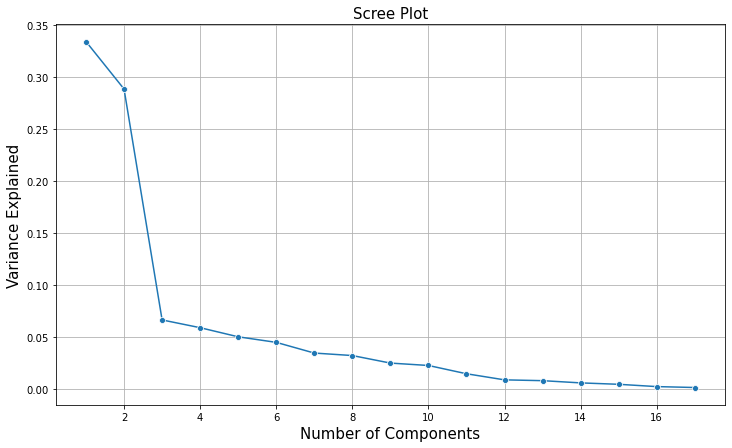

In [198]:
# Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=pca.explained_variance_ratio_,x=range(1,len(pca.explained_variance_ratio_)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

### 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [199]:
cols = scaled_df.columns
egn_vec = pca.components_[0]

for i in range(0,len(cols)):
    print("({0}*{1})".format(round(egn_vec[i],2), cols[i]),end=' + ')

(0.26*Apps) + (0.23*Accept) + (0.19*Enroll) + (0.34*Top10perc) + (0.33*Top25perc) + (0.16*F.Undergrad) + (0.02*P.Undergrad) + (0.28*Outstate) + (0.24*Room.Board) + (0.1*Books) + (-0.04*Personal) + (0.33*PhD) + (0.32*Terminal) + (-0.16*S.F.Ratio) + (0.19*perc.alumni) + (0.33*Expend) + (0.24*Grad.Rate) + 

### 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [200]:
# Cummulation of expained ratio to identify how much PCs hold how much information
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
cumulative_var

array([ 0.334 ,  0.622 ,  0.688 ,  0.747 ,  0.797 ,  0.842 ,  0.876 ,
        0.908 ,  0.933 ,  0.955 ,  0.970 ,  0.978 ,  0.986 ,  0.992 ,
        0.997 ,  0.999 ,  1.000 ])

In [201]:
eigen_values = pca.explained_variance_ratio_

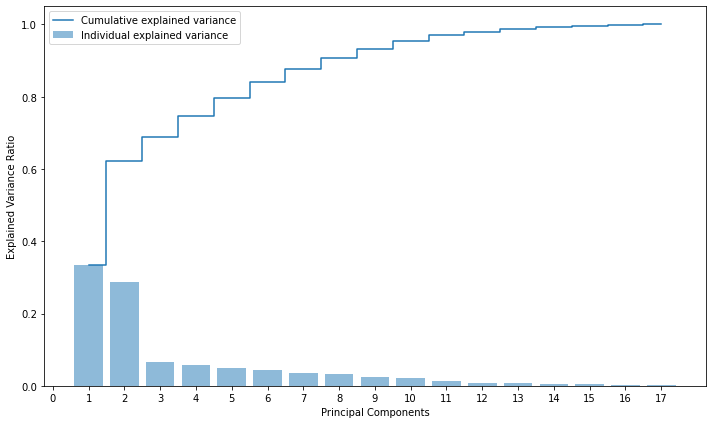

In [202]:
plt.figure(figsize=(10 , 6))
plt.bar(range(1, eigen_values.size + 1), eigen_values, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigen_values.size + 1), cumulative_var, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.xticks(range(0,18,1))
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [203]:
df_pca_comp.T.head(8)

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
PC1  0.260650  0.229346  0.187241   0.338573   0.334223     0.160923   
PC2  0.315477  0.346131  0.383486  -0.097916  -0.058107     0.399231   
PC3 -0.075692 -0.102280 -0.083051   0.076752   0.048214    -0.072233   
PC4  0.082170  0.103074 -0.001497  -0.378350  -0.425839     0.008054   
PC5  0.227402  0.196354  0.170502   0.140931   0.118276     0.112635   
PC6  0.018375 -0.004887 -0.055144  -0.078745  -0.018524    -0.042759   
PC7 -0.022458 -0.008800 -0.012069  -0.257262  -0.240754    -0.028944   
PC8 -0.088542 -0.135796 -0.143415   0.289418   0.344158    -0.109157   

     P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
PC1     0.020473  0.283952    0.244370  0.096430 -0.037345  0.328338   
PC2     0.357422 -0.250652   -0.130688  0.094278  0.232494  0.056646   
PC3    -0.040740 -0.011314    0.028198  0.700079  0.526962 -0.090790   
PC4     0.233145  0.259595    0.582623 -0.049629 -0.123143 -0.101077   
PC5    -0.070500  0.060597   -0.039424 -0.025473 -0.002030 -0.557355   
PC6    -0.020269 -0.011085    0.243172  0.633151 -0.382645 -0.042927   
PC7    -0.012913  0.096100    0.097891 -0.111984  0.640029  0.080464   
PC8     0.120175  0.009240    0.386791 -0.242853  0.277331 -0.031911   

     Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
PC1  0.323431  -0.163463     0.187193  0.328814   0.241701  
PC2  0.044341   0.258867    -0.256003 -0.158350  -0.166911  
PC3 -0.067559  -0.277620    -0.104312  0.186606  -0.239818  
PC4 -0.043254  -0.248817    -0.232483  0.215050  -0.070376  
PC5 -0.602290  -0.195968     0.108340  0.011731   0.315592  
PC6 -0.013818   0.458516     0.021569 -0.233845   0.337405  
PC7  0.075793   0.144139     0.384792 -0.149440   0.479305  
PC8 -0.090793   0.235489    -0.573249 -0.115582   0.179760

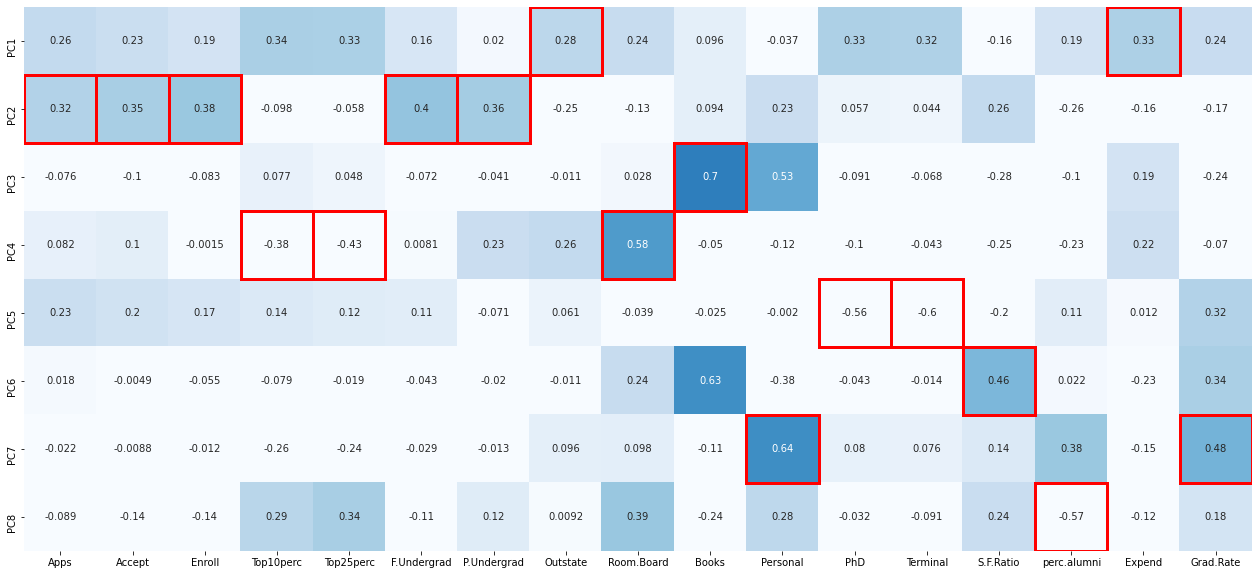

In [204]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_comp.T.head(8), annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

column_max = df_pca_comp.T.head(8).abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_comp.T.columns):
    position = df_pca_comp.T.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))